# 300_analysis_Movie_Industry_without_harmonic_mean

This dataset consists of 6820 movies (from 1986 - 2016)

The dataset can be found on Kaggle: https://www.kaggle.com/danielgrijalvas/movies

# Data Analysis

Before analysing the data we need to load in the dataset.  

In [22]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# Ensure the file exists
if  not os.path.exists("movies.csv"):
    print("Missing dataset file")


In [24]:
movies = pd.read_csv('movies.csv',  encoding='latin-1') # Loading in the dataset

In [25]:
movies.head(5) # Brings up the first 5 rows

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [26]:
movies['released'] = pd.to_datetime(movies['released'])
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
budget      6820 non-null float64
company     6820 non-null object
country     6820 non-null object
director    6820 non-null object
genre       6820 non-null object
gross       6820 non-null float64
name        6820 non-null object
rating      6820 non-null object
released    6820 non-null datetime64[ns]
runtime     6820 non-null int64
score       6820 non-null float64
star        6820 non-null object
votes       6820 non-null int64
writer      6820 non-null object
year        6820 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 799.3+ KB


# Data visualisation and Analysis

This section will focus on gaining further insights into the data, we will analyse and explain any trends which may arise.

# Average score of movies by years

Text(0,0.5,'Score')

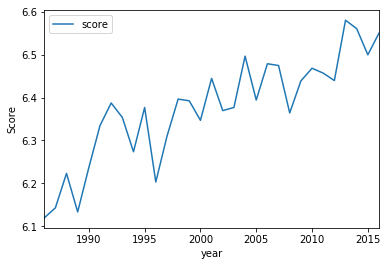

In [27]:
averagescore = movies.groupby(['year'])[['score']].mean()
averagescore.plot()
plt.ylabel('Score')

It is interesting to see that the average score of movies increases as the years go by.

In [28]:
movies['score'].mean()

6.374897360703794

# Most common genres

Text(0,0.5,'Releases')

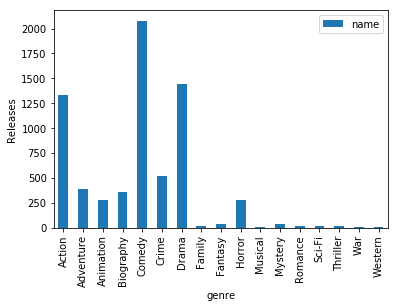

In [29]:
popgenre = movies.groupby(['genre'])[['name']].count()
popgenre.plot(kind = 'bar')
plt.ylabel('Releases')

This might be an inaccurate representation of the data as the dataset only includes one genre per movie.

# Average runtime by genre

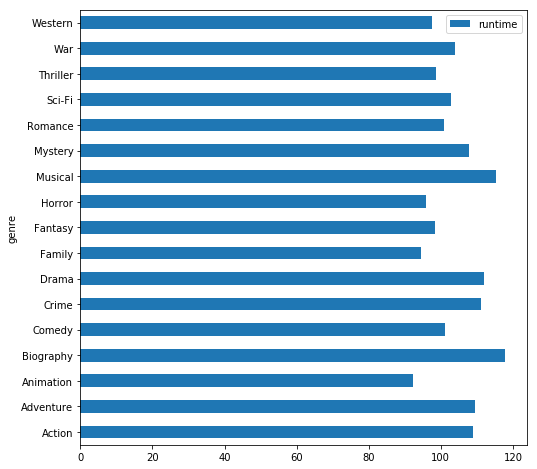

In [30]:
genreruntime = movies.groupby(['genre'])[['runtime']].mean().plot(kind = 'barh', figsize=(8,8))

There is no real correlation to see here.

# Average runtime over the years

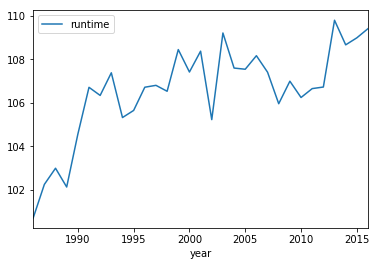

In [31]:
runtimeyears = movies.groupby(['year'])[['runtime']].mean()
runtimeyears.plot()

The runtime of movies tends to increase over the years. The increase isnt that great, however, the trend definitely shows that the movies are getting longer as the time goes by.

# Average budget by genre

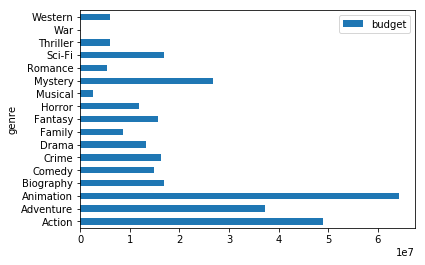

In [32]:
averagebudget = movies.groupby(['genre'])[['budget']].mean()
averagebudget.plot(kind = 'barh')

The results are not that surprising. The genres which have the biggest budget usually need it in order to compete in todays market.

# Average Budget and Gross by genre

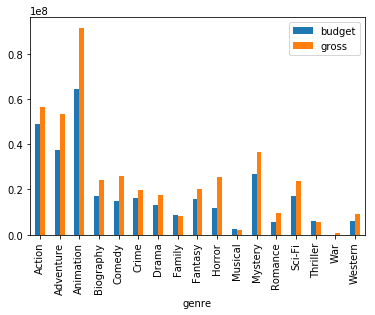

In [33]:
profit = movies.groupby(
    ['genre'])[['budget', 'gross']].mean()

profit.plot(kind = 'bar')


Most genres tend to earn more that their original budget, with animation killing it. Genres such as Family, Musicals and Thrillers are the only ones that seem to lose money.

# Most common rating

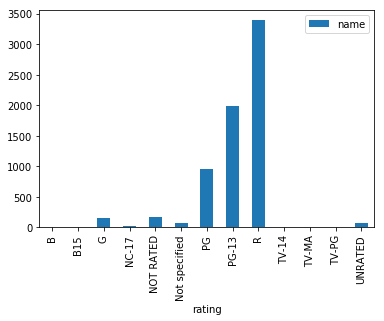

In [34]:
poprating = movies.groupby(['rating'])[['name']].count()
poprating.plot(kind = 'bar')

In [35]:
q = movies['rating'] == 'R'
q.value_counts()

False    3428
True     3392
Name: rating, dtype: int64

Its really interesting to see that the most popular rating for movies is R. With so many blockbusters coming out every year aimed for younger audiences, we were surprised by this result.